Data Source https://www.kaggle.com/martinellis/nhl-game-data?select=game_plays.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
player = pd.read_csv('game_skater_stats.csv')
plays = pd.read_csv('game_plays.csv')
player_info = pd.read_csv('player_info.csv')
skater_stats= pd.read_csv('game_skater_stats.csv')
team_stats = pd.read_csv('game_teams_stats.csv')
team_info = pd.read_csv('team_info.csv')
teams = team_info.merge(team_stats, on='team_id')
players = player_info.merge(skater_stats, on='player_id')
game= pd.read_csv('game.csv')

# Plays

In [3]:
plays.shape

(3632349, 20)

In [4]:
nullplays= plays.isna().sum()
nullplays/len(plays)

play_id                0.000000
game_id                0.000000
play_num               0.000000
team_id_for            0.193093
team_id_against        0.193093
event                  0.000000
secondaryType          0.784459
x                      0.195173
y                      0.195168
period                 0.000000
periodType             0.000000
periodTime             0.000000
periodTimeRemaining    0.000000
dateTime               0.000000
goals_away             0.000000
goals_home             0.000000
description            0.000000
st_x                   0.195173
st_y                   0.195168
rink_side              0.216773
dtype: float64

In [5]:
plays.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right
4,2011030221_5,2011030221,5,4.0,1.0,Giveaway,NaN,28.0,24.0,1,REGULAR,21,1179,2012-04-29 19:21:02,0,0,Giveaway by Kimmo Timonen,-28.0,-24.0,right


In [6]:
plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [7]:
plays.event.unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Giveaway', 'Blocked Shot', 'Shot', 'Hit', 'Stoppage', 'Goal',
       'Penalty', 'Takeaway', 'Missed Shot', 'Period End',
       'Period Official', 'Game End', 'Game Official',
       'Official Challenge', 'Shootout Complete',
       'Early Intermission Start', 'Early Intermission End',
       'Emergency Goaltender'], dtype=object)

In [8]:
plays['event']

0           Game Scheduled
1             Period Ready
2             Period Start
3                  Faceoff
4                 Giveaway
                ...       
3632344            Faceoff
3632345               Shot
3632346         Period End
3632347    Period Official
3632348           Game End
Name: event, Length: 3632349, dtype: object

## Shots

In [9]:
#Plays that are shots
shots=plays[(plays.event == 'Shot') | (plays.event == 'Missed Shot') | (plays.event == 'Blocked Shot') | (plays.event == 'Shot')]
shots.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
5,2011030221_6,2011030221,6,4.0,1.0,Blocked Shot,NaN,52.0,28.0,1,REGULAR,26,1174,2012-04-29 19:21:07,0,0,Max Talbot blocked shot from Patrik Elias,-52.0,-28.0,right
6,2011030221_7,2011030221,7,1.0,4.0,Shot,Wrist Shot,80.0,-3.0,1,REGULAR,30,1170,2012-04-29 19:21:12,0,0,Patrik Elias Wrist Shot saved by Ilya Bryzgalov,80.0,-3.0,left
11,2011030221_12,2011030221,12,1.0,4.0,Shot,Wrap-around,88.0,-4.0,1,REGULAR,139,1061,2012-04-29 19:23:29,0,0,Ryan Carter Wrap-around saved by Ilya Bryzgalov,88.0,-4.0,left
12,2011030221_13,2011030221,13,1.0,4.0,Shot,Wrist Shot,81.0,-27.0,1,REGULAR,154,1046,2012-04-29 19:23:44,0,0,Stephen Gionta Wrist Shot saved by Ilya Bryzgalov,81.0,-27.0,left
24,2011030221_25,2011030221,25,1.0,4.0,Shot,Snap Shot,63.0,-19.0,1,REGULAR,274,926,2012-04-29 19:28:00,1,0,Travis Zajac Snap Shot saved by Ilya Bryzgalov,63.0,-19.0,left


There are three kinds of shots: shots on goal (shot), missed shot, and blocked shot

blocked shots for corsi rating, use team_id_against; otherwise use team_id_for

In [10]:
shots.shape

(1217675, 20)

In [11]:
shotsg= shots.groupby(shots['event'])

In [12]:
shotsg.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
5,2011030221_6,2011030221,6,4.0,1.0,Blocked Shot,NaN,52.0,28.0,1,REGULAR,26,1174,2012-04-29 19:21:07,0,0,Max Talbot blocked shot from Patrik Elias,-52.0,-28.0,right
6,2011030221_7,2011030221,7,1.0,4.0,Shot,Wrist Shot,80.0,-3.0,1,REGULAR,30,1170,2012-04-29 19:21:12,0,0,Patrik Elias Wrist Shot saved by Ilya Bryzgalov,80.0,-3.0,left
11,2011030221_12,2011030221,12,1.0,4.0,Shot,Wrap-around,88.0,-4.0,1,REGULAR,139,1061,2012-04-29 19:23:29,0,0,Ryan Carter Wrap-around saved by Ilya Bryzgalov,88.0,-4.0,left
12,2011030221_13,2011030221,13,1.0,4.0,Shot,Wrist Shot,81.0,-27.0,1,REGULAR,154,1046,2012-04-29 19:23:44,0,0,Stephen Gionta Wrist Shot saved by Ilya Bryzgalov,81.0,-27.0,left
24,2011030221_25,2011030221,25,1.0,4.0,Shot,Snap Shot,63.0,-19.0,1,REGULAR,274,926,2012-04-29 19:28:00,1,0,Travis Zajac Snap Shot saved by Ilya Bryzgalov,63.0,-19.0,left
25,2011030221_26,2011030221,26,1.0,4.0,Shot,Snap Shot,68.0,1.0,1,REGULAR,282,918,2012-04-29 19:28:08,1,0,Travis Zajac Snap Shot saved by Ilya Bryzgalov,68.0,1.0,left
33,2011030221_34,2011030221,34,1.0,4.0,Missed Shot,NaN,74.0,-27.0,1,REGULAR,417,783,2012-04-29 19:31:13,1,0,Ryan Carter - Wide of Net,74.0,-27.0,left
37,2011030221_38,2011030221,38,4.0,1.0,Blocked Shot,NaN,53.0,10.0,1,REGULAR,427,773,2012-04-29 19:33:34,1,0,Jaromir Jagr blocked shot from Bryce Salvador,-53.0,-10.0,right
38,2011030221_39,2011030221,39,4.0,1.0,Blocked Shot,NaN,46.0,-17.0,1,REGULAR,441,759,2012-04-29 19:33:48,1,0,Scott Hartnell blocked shot from Marek Zidlicky,-46.0,17.0,right
46,2011030221_47,2011030221,47,4.0,1.0,Blocked Shot,NaN,61.0,18.0,1,REGULAR,534,666,2012-04-29 19:35:51,1,0,Andreas Lilja blocked shot from Anton Volchenkov,-61.0,-18.0,right


In [13]:
Goals = plays[plays['event']== 'Goal']
totalgoals= Goals.groupby('secondaryType').count()

[Text(0, 0, 'Wrist Shot'),
 Text(0, 0, 'Snap Shot'),
 Text(0, 0, 'Slap Shot'),
 Text(0, 0, 'Backhand'),
 Text(0, 0, 'Tip-In'),
 Text(0, 0, 'Deflected'),
 Text(0, 0, 'Wrap-around')]

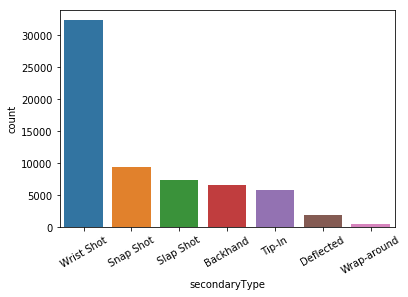

In [14]:
plot = sns.countplot(x = 'secondaryType',
                    data = Goals,
                    order = Goals['secondaryType'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 30)

# Players

In [15]:
players.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link,game_id,team_id,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412,2011030221,1,...,0,0,0,0,0,0,-1,885,98,16
1,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412,2011030222,1,...,0,0,0,0,0,1,0,919,54,20
2,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412,2011030223,1,...,1,0,0,0,0,0,1,1023,68,0
3,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412,2011030224,1,...,0,0,0,0,0,0,1,899,41,55
4,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412,2011030225,1,...,1,0,0,0,0,1,1,636,40,12


In [16]:
players.columns

Index(['player_id', 'firstName', 'lastName', 'nationality', 'birthCity',
       'primaryPosition', 'birthDate', 'link', 'game_id', 'team_id',
       'timeOnIce', 'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
       'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
       'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists',
       'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce'],
      dtype='object')

In [17]:
players.shape

(411578, 29)

In [18]:
player = pd.merge(player, player_info, on ='player_id', how = 'left')
player =pd.merge(player, team_info, on = 'team_id', how = 'left')
player.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,nationality,birthCity,primaryPosition,birthDate,link_x,franchiseId,shortName,teamName,abbreviation,link_y
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501,23,New Jersey,Devils,NJD,/api/v1/teams/1
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,CAN,Quebec City,RW,1985-03-31,/api/v1/people/8470609,23,New Jersey,Devils,NJD,/api/v1/teams/1
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,USA,Nashua,D,1987-05-15,/api/v1/people/8471816,23,New Jersey,Devils,NJD,/api/v1/teams/1
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,USA,Rochester,RW,1983-10-09,/api/v1/people/8472410,23,New Jersey,Devils,NJD,/api/v1/teams/1


Text(0.5, 1.0, 'Time on Ice Distribution by Minutes')

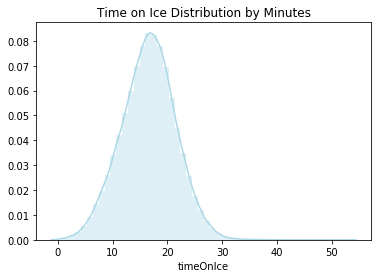

In [19]:
dist=sns.distplot(player.timeOnIce/60, color='lightblue')
dist.set_title('Time on Ice Distribution by Minutes')

In [20]:
player['GoalsPerMin']= (player.goals*60)/player.timeOnIce
player['PointsPerMin']=(player.assists + player.goals)*60/player.timeOnIce
player.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,primaryPosition,birthDate,link_x,franchiseId,shortName,teamName,abbreviation,link_y,GoalsPerMin,PointsPerMin
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,LW,1980-04-09,/api/v1/people/8467412,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,D,1982-02-25,/api/v1/people/8468501,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,RW,1985-03-31,/api/v1/people/8470609,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,D,1987-05-15,/api/v1/people/8471816,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,RW,1983-10-09,/api/v1/people/8472410,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0


In [21]:
playeractive= player[player['timeOnIce']>= 300]
top10players = playeractive.nlargest(10, 'GoalsPerMin')
top10players = top10players[['firstName', 'lastName', 'primaryPosition', 'GoalsPerMin', 'goals']]
top10players

,firstName,lastName,primaryPosition,GoalsPerMin,goals
75700,Tomas,Hertl,C,0.357143,4
380560,Zach,Parise,LW,0.312500,3
186046,Frank,Vatrano,C,0.292208,3
74183,Nick,Bonino,C,0.289389,3
314224,Matt,Kassian,LW,0.280374,2
235728,Patrice,Bergeron,C,0.279720,4
341432,Blake,Geoffrion,C,0.279070,3
286713,Andreas,Johnsson,LW,0.277778,3
221364,Scott,Hartnell,LW,0.275229,3
236623,Jack,Skille,RW,0.273349,2


In [22]:
player['Points']= player.goals +player.assists

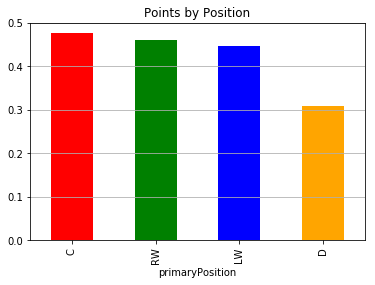

In [23]:
positions=player.groupby('primaryPosition').Points.mean().loc[["C", "RW", "LW","D"]].plot(kind='bar',color=['r', 'g', 'b', 'orange'],title='Points by Position').grid(axis='y')

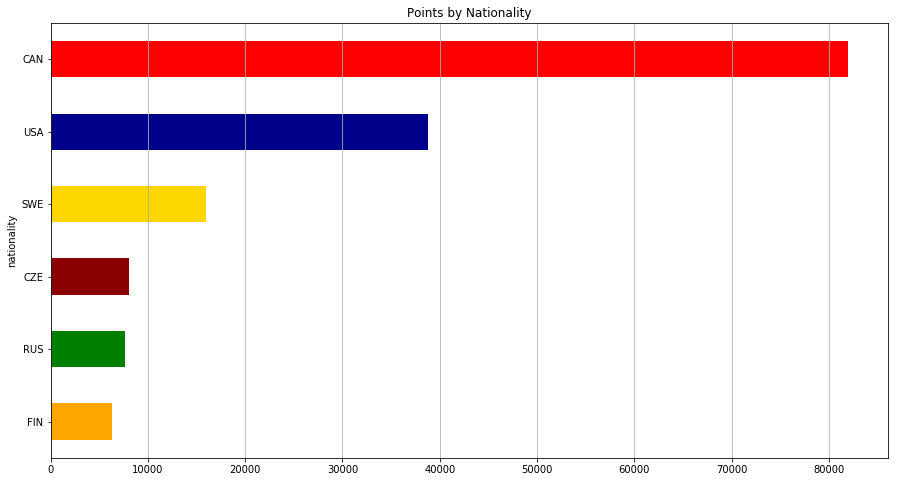

In [24]:
nat = player.groupby(['nationality'])['Points'].agg('sum').nlargest(6)
nat.sort_values(ascending=True).plot(kind='barh', 
                                     figsize = (15,8), 
                                     color=['orange', 'g', 'darkred', 'gold', 'darkblue', 'red'],
                                    title='Points by Nationality').grid(axis='x')

In [25]:
hits= player.groupby('hits').agg('sum')
hits.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,powerPlayGoals,powerPlayAssists,penaltyMinutes,...,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,franchiseId,GoalsPerMin,PointsPerMin,Points
hits,,,,,,,,,,,,,,,,,,,,,
0,301798132792401,1269538911133,2611163,148437483,43663,25744,263245,5785,11655,66180,...,661,108170,1832,123749081,9401812,15286590,3300404,1558.508537,4120.083986,69407
1,238371311715171,1002766558390,2062686,117397487,30877,18001,199482,3931,7533,63919,...,534,94982,-825,98592170,8343660,10461657,2602123,1095.941057,2890.729090,48878
2,143012698862126,601623447635,1235123,70584810,16852,9771,116358,2024,3676,44143,...,323,60925,-1842,59730248,5320062,5534500,1554051,598.862369,1579.433766,26623
3,76547556911244,322019637960,670425,37862744,8123,4872,60934,986,1667,25819,...,168,34129,-1289,32247145,2941487,2674112,831524,297.166553,768.186893,12995
4,37346427919111,157111970443,322495,18593778,3783,2335,29576,451,718,13549,...,77,16867,-641,15905805,1460669,1227304,402162,143.535921,362.123742,6118


In [26]:
teams.columns

Index(['team_id', 'franchiseId', 'shortName', 'teamName', 'abbreviation',
       'link', 'game_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways'],
      dtype='object')

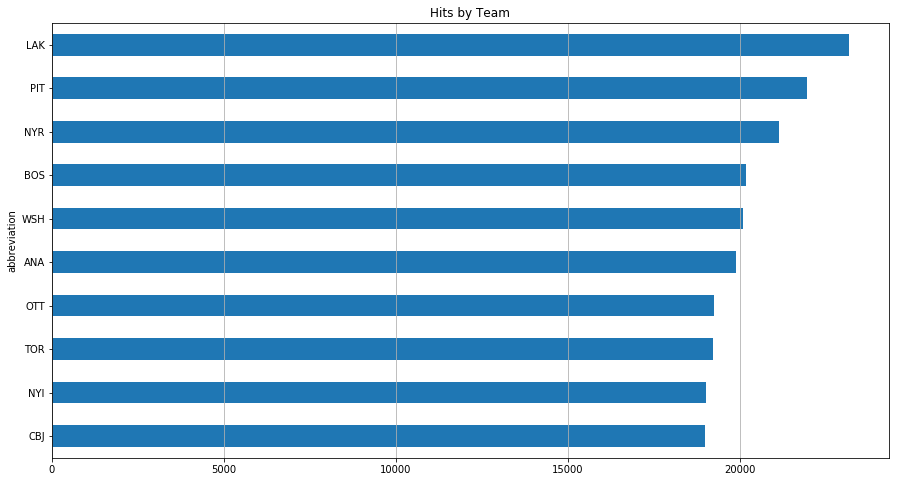

In [27]:
teamhits=player.groupby(['abbreviation'])['hits'].agg('sum').nlargest(10)
teamhits.sort_values(ascending=True).plot(kind='barh',
                                         figsize=(15,8),
                                         title='Hits by Team').grid(axis='x')

In [28]:
teams.faceOffWinPercentage =teams.faceOffWinPercentage.astype(int)
teams.won= teams.won.astype(int)

In [29]:
teams['TakeawayDiff']= (teams.takeaways - teams.giveaways)

In [30]:
teamwins = teams.groupby(['abbreviation'])['won'].agg('sum')
teamwins

abbreviation
ANA    423
ARI    157
ATL     34
BOS    465
BUF    276
CAR    319
CBJ    359
CGY    350
CHI    436
COL    332
DAL    372
DET    357
EDM    285
FLA    317
LAK    406
MIN    373
MTL    380
NJD    328
NSH    418
NYI    352
NYR    426
OTT    338
PHI    367
PHX    152
PIT    478
SJS    442
STL    445
TBL    449
TOR    341
VAN    360
VGK    110
WPG    326
WSH    461
Name: won, dtype: int64

In [45]:
teamgamesplayed = teams.groupby(['abbreviation'])['game_id'].agg('count')
teamgamesplayed.sort_values(ascending=False)

abbreviation
PIT    815
BOS    812
SJS    805
WSH    804
NYR    802
CHI    793
TBL    790
STL    788
NSH    787
LAK    783
ANA    774
MTL    751
DET    751
MIN    748
OTT    746
PHI    745
VAN    744
NYI    736
DAL    736
NJD    733
TOR    731
CBJ    731
COL    729
CGY    724
CAR    719
FLA    717
EDM    717
BUF    711
WPG    649
ARI    410
PHX    314
VGK    191
ATL     82
Name: game_id, dtype: int64

In [32]:
GameWinPercentage= teamwins/teamgamesplayed


In [44]:
GameWinPercentage.sort_values(ascending = False)


abbreviation
PIT    0.586503
VGK    0.575916
WSH    0.573383
BOS    0.572660
TBL    0.568354
STL    0.564721
CHI    0.549811
SJS    0.549068
ANA    0.546512
NYR    0.531172
NSH    0.531131
LAK    0.518519
MTL    0.505992
DAL    0.505435
WPG    0.502311
MIN    0.498663
PHI    0.492617
CBJ    0.491108
PHX    0.484076
VAN    0.483871
CGY    0.483425
NYI    0.478261
DET    0.475366
TOR    0.466484
COL    0.455418
OTT    0.453083
NJD    0.447476
CAR    0.443672
FLA    0.442120
ATL    0.414634
EDM    0.397490
BUF    0.388186
ARI    0.382927
dtype: float64

In [35]:
player['season'] = player.game_id.astype(str).str[:4]


In [36]:
player.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,link_x,franchiseId,shortName,teamName,abbreviation,link_y,GoalsPerMin,PointsPerMin,Points,season
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,/api/v1/people/8467412,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0,0,2011
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,/api/v1/people/8468501,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0,0,2011
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,/api/v1/people/8470609,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0,0,2011
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,/api/v1/people/8471816,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0,0,2011
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,/api/v1/people/8472410,23,New Jersey,Devils,NJD,/api/v1/teams/1,0.0,0.0,0,2011


In [37]:
player.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_x', 'franchiseId', 'shortName', 'teamName',
       'abbreviation', 'link_y', 'GoalsPerMin', 'PointsPerMin', 'Points',
       'season'],
      dtype='object')

In [47]:
season_stats = player.groupby(['player_id','team_id', 'season'], as_index= False).agg(
    {
        'timeOnIce':sum, #sum time on ice 
        'assists':sum, #sum assists
        'goals':sum,
        'shots':sum,
        'hits':sum,
        'powerPlayGoals':sum,
        'powerPlayAssists':sum,
        'penaltyMinutes':sum,
        'faceOffWins':sum,
        'faceoffTaken':sum,
        'takeaways':sum,
        'giveaways':sum,
        'shortHandedGoals':sum,
        'shortHandedAssists':sum,
        'blocked':sum,
        'plusMinus':sum,
        'evenTimeOnIce':sum,
        'shortHandedTimeOnIce':sum,
        'powerPlayTimeOnIce':sum,
        
        
    
    }


)

In [48]:
season_stats.shape

(8646, 22)

In [49]:
season_stats

,player_id,team_id,season,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,8446485,17,2010,33946,6,6,60,59,0,0,...,220,19,8,0,0,16,3,31092,2718,136
1,8448208,1,2013,94259,43,24,231,4,5,12,...,2,36,59,0,0,9,16,79753,246,14260
2,8448208,1,2014,60473,18,11,119,13,2,5,...,0,31,34,0,0,8,-10,52621,36,7816
3,8448208,4,2011,81465,42,20,196,15,8,18,...,2,24,50,0,0,15,0,65413,70,15982
4,8448208,6,2012,35831,17,2,86,16,0,5,...,0,15,23,0,0,7,2,30713,11,5107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,8481442,13,2018,760,0,0,1,2,0,0,...,0,0,0,0,0,1,1,760,0,0
8642,8481477,30,2018,1534,0,0,7,3,0,0,...,17,0,0,0,0,2,0,1434,86,14
8643,8481479,23,2018,1602,0,0,3,0,0,0,...,0,1,1,0,0,2,-1,1602,0,0
8644,8481481,26,2018,672,0,0,1,0,0,0,...,8,1,0,0,0,1,-1,672,0,0


In [55]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


In [57]:
player_season = pd.merge(season_stats, player_info, on ='player_id', how = 'left')
player_season =pd.merge(season_stats, team_info, on = 'team_id', how = 'left')
player_season.head()

,player_id,team_id,season,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,franchiseId,shortName,teamName,abbreviation,link
0,8446485,17,2010,33946,6,6,60,59,0,0,...,16,3,31092,2718,136,12,Detroit,Red Wings,DET,/api/v1/teams/17
1,8448208,1,2013,94259,43,24,231,4,5,12,...,9,16,79753,246,14260,23,New Jersey,Devils,NJD,/api/v1/teams/1
2,8448208,1,2014,60473,18,11,119,13,2,5,...,8,-10,52621,36,7816,23,New Jersey,Devils,NJD,/api/v1/teams/1
3,8448208,4,2011,81465,42,20,196,15,8,18,...,15,0,65413,70,15982,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
4,8448208,6,2012,35831,17,2,86,16,0,5,...,7,2,30713,11,5107,6,Boston,Bruins,BOS,/api/v1/teams/6


In [59]:
player_season = pd.merge(season_stats, player_info, on ='player_id')

In [60]:
player_season

,player_id,team_id,season,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8446485,17,2010,33946,6,6,60,59,0,0,...,31092,2718,136,Kris,Draper,CAN,Toronto,C,1971-05-24,/api/v1/people/8446485
1,8448208,1,2013,94259,43,24,231,4,5,12,...,79753,246,14260,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208
2,8448208,1,2014,60473,18,11,119,13,2,5,...,52621,36,7816,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208
3,8448208,4,2011,81465,42,20,196,15,8,18,...,65413,70,15982,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208
4,8448208,6,2012,35831,17,2,86,16,0,5,...,30713,11,5107,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,8481442,13,2018,760,0,0,1,2,0,0,...,760,0,0,Brady,Keeper,CAN,Cross Lake,D,1996-06-05,/api/v1/people/8481442
8642,8481477,30,2018,1534,0,0,7,3,0,0,...,1434,86,14,Nico,Sturm,DEU,Augsburg,C,1995-05-03,/api/v1/people/8481477
8643,8481479,23,2018,1602,0,0,3,0,0,0,...,1602,0,0,Brogan,Rafferty,USA,WEST DUNDEE,D,1995-05-28,/api/v1/people/8481479
8644,8481481,26,2018,672,0,0,1,0,0,0,...,672,0,0,Blake,Lizotte,NaN,NaN,C,1997-12-13,/api/v1/people/8481481


In [61]:
player_season.columns

Index(['player_id', 'team_id', 'season', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link'],
      dtype='object')

In [62]:
df= player_season

In [63]:
df.to_csv('final_data.csv')

In [64]:
df['GoalsPerMin']= (df.goals*60)/df.timeOnIce
df['PointsPerMin']=(df.assists + df.goals)*60/df.timeOnIce
df.head()

,player_id,team_id,season,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,powerPlayTimeOnIce,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link,GoalsPerMin,PointsPerMin
0,8446485,17,2010,33946,6,6,60,59,0,0,...,136,Kris,Draper,CAN,Toronto,C,1971-05-24,/api/v1/people/8446485,0.010605,0.021210
1,8448208,1,2013,94259,43,24,231,4,5,12,...,14260,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208,0.015277,0.042648
2,8448208,1,2014,60473,18,11,119,13,2,5,...,7816,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208,0.010914,0.028773
3,8448208,4,2011,81465,42,20,196,15,8,18,...,15982,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208,0.014730,0.045664
4,8448208,6,2012,35831,17,2,86,16,0,5,...,5107,Jaromir,Jagr,CZE,Kladno,RW,1972-02-15,/api/v1/people/8448208,0.003349,0.031816
